In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=False)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df).sort_values(by="Ratio", ascending=False)
    return missing_df


def check_df(dataframe, head=5, tail=5):
    print("*" * 70)
    print(" Shape ".center(70, "*"))
    print("*" * 70)
    print(dataframe.shape)

    print("*" * 70)
    print(" Types ".center(70, "*"))
    print("*" * 70)
    print(dataframe.dtypes)

    print("*" * 70)
    print(" Head ".center(70, "*"))
    print("*" * 70)
    print(dataframe.head(head))

    print("*" * 70)
    print(" Tail ".center(70, "*"))
    print("*" * 70)
    print(dataframe.tail(tail))

    print("*" * 70)
    print(" NA ".center(70, "*"))
    print("*" * 70)
    print(missing_values_analysis(dataframe))

    print("*" * 70)
    print(" Quantiles ".center(70, "*"))
    print("*" * 70)
    print(dataframe.describe([.01, .05, .1, .5, .9, .95, .99]).T)

    print("*" * 70)
    print(" Duplicate Rows ".center(70, "*"))
    print("*" * 70)
    print(dataframe.duplicated().sum())

    print("*" * 70)
    print(" Uniques ".center(70, "*"))
    print("*" * 70)
    print(dataframe.nunique())

In [2]:
train = pd.read_csv("./data/train.csv", encoding="latin-1")
train.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
0,1829,{'L05'},{'C'},Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333
1,1104,{'N20.1'},{'C'},Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972
2,1850,{'K80.8'},{'B'},Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647
3,1059,"{nan, 'M51.1'}","{0, 'B'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871
4,608,"{'M51.1', nan, 'M48.0'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046


In [4]:
train[:20]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
0,1829,{'L05'},{'C'},Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333
1,1104,{'N20.1'},{'C'},Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972
2,1850,{'K80.8'},{'B'},Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647
3,1059,"{nan, 'M51.1'}","{0, 'B'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871
4,608,"{'M51.1', nan, 'M48.0'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046
5,1895,{'M95.0'},"{'D', 'C'}",Genel Anestezi,Burnun kazan?lm?? deformitesi,33,MALE,PLAST?K CERRAH?,39,13,11146
6,337,"{nan, 'K40.3'}","{'B', 'C'}",Spinal Anestezi,"Tek tarafl? veya tan?mlanmam?? inguinal herni,...",55,MALE,GENEL CERRAH? SERV?S?,5,11,2843
7,1087,"{nan, 'K40.9'}","{'B', 'C'}",Spinal Anestezi,"Tek tarafl? veya tan?mlanmam?? inguinal herni,...",56,MALE,GENEL CERRAH? SERV?S?,47,3,3520
8,763,{'I83'},"{0, 'E'}",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,59,MALE,KVC SERV?S?,25,1,1906
9,208,{'M54.5'},"{0, 'B'}",Genel Anestezi,NaN,18,FEMALE,ORTOPED? SERV?S?,21,10,6246


In [7]:
check_df(train)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(2822, 11)
**********************************************************************
******************************* Types ********************************
**********************************************************************
ID                      int64
DiagnosticICD10Code    object
SurgeryGroup           object
AnesthesiaType         object
SurgeryName            object
Age                     int64
Sex                    object
Service                object
DoctorID                int64
AnaesthetistID          int64
ElapsedTime(second)     int64
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
     I

In [18]:
train["ID"].value_counts()[:16]

489     2
3165    2
2981    2
3606    2
3470    2
3527    2
521     2
425     2
2666    2
1840    2
320     2
219     2
325     2
1032    2
2840    2
2273    2
Name: ID, dtype: int64

In [23]:
train[train.ID == 2273]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
1221,2273,"{nan, 'M20.1', 'I87.2'}","{'B', 'C'}",Spinal Anestezi,NaN,60,FEMALE,ORTOPED? SERV?S?,32,11,6474
1871,2273,"{nan, 'M20.1', 'I87.2'}","{'B', 'C'}",Spinal Anestezi,NaN,60,FEMALE,ORTOPED? SERV?S?,32,11,6472


In [21]:
train[train.ID == 3016]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
142,3016,{'M62.0'},{'B'},Genel Anestezi,Kas?n diastaz?,32,FEMALE,PLAST?K CERRAH?,39,2,7400
2160,3016,{'M62.0'},{'B'},Genel Anestezi,Kas?n diastaz?,32,FEMALE,PLAST?K CERRAH?,39,2,7400


In [19]:
train[train.duplicated()]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
238,1433,{'Z12.6'},"{'B', 'A3'}",Spinal Anestezi,Mesane neoplazm? için özel tarama muayenesi,53,MALE,ÜROLOJ? SERV?S?,26,3,8310
771,307,"{'M51.1', nan, 'M48.06', 'M43.16'}","{0, 'B', 'A3', 'C'}",Genel Anestezi,"?ntervertebral disk bozukluklar? di?er, tan?ml...",62,FEMALE,ORTOPED? SERV?S?,21,3,12475
948,320,"{nan, 'K40.9', 'I78.1'}","{'D', 'B', 'C'}",Spinal Anestezi,NaN,38,MALE,GENEL CERRAH? SERV?S?,36,3,5475
972,2666,"{'K21', 'I87.2', 'S82.3'}","{'B', 'C'}",Spinal Anestezi,Eklem a?r?s?,40,MALE,ORTOPED? SERV?S?,32,12,4640
1139,3545,"{'K21.0', 'M17.9', 'I87.2'}","{'A3', 'C'}",Genel Anestezi,"Gonartroz, tan?mlanmam??",50,FEMALE,ORTOPED? SERV?S?,32,14,11400
1309,2694,"{'N20.0', 'D64.9'}","{'D', 'C'}",Spinal Anestezi,Böbrek ta??,54,MALE,ÜROLOJ? SERV?S?,26,13,1630
1407,2939,"{'I74.3', 'M25.5'}",{'B'},Spinal Anestezi,Eklem a?r?s?,70,FEMALE,ORTOPED? SERV?S?,40,12,8945
1466,2259,"{'J30', 'R07.0'}","{0, 'E'}",Genel Anestezi,Nazal septum deviasyonu,36,FEMALE,KBB SERV?S?,18,12,1330
1528,223,"{'K21.9', 'K80'}",{'D'},Genel Anestezi,NaN,53,FEMALE,GENEL CERRAH? SERV?S?,33,1,2765
1529,1571,"{'W19', 'Z00.8', 'S52.20'}",{'B'},Genel Anestezi,"Ulna ?aft? k?r???, kapal?",52,MALE,ORTOPED? SERV?S?,40,12,5410


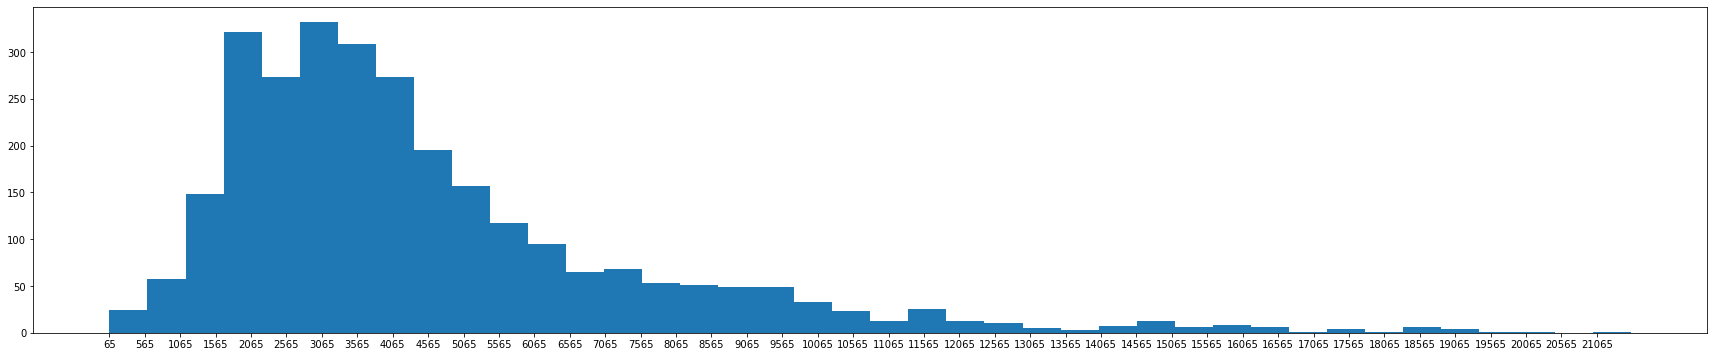

In [41]:
plt.figure(figsize=(30,6))
plt.hist(train["ElapsedTime(second)"], bins=40)
plt.xticks(range(min(train["ElapsedTime(second)"]), max(train["ElapsedTime(second)"])+1, 500))
plt.show()


In [30]:
train[train["ElapsedTime(second)"]<300]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
20,939,{'N47'},"{0, 'D'}",Sedo Analjezi,"Sünnet derisinin fazlal???, fimozis ve parafim...",0,MALE,ÜROLOJ? SERV?S?,11,4,166
331,2624,{'M25.5'},"{'B', 'C'}",Genel Anestezi,Eklem a?r?s?,57,FEMALE,ORTOPED? SERV?S?,40,13,97
611,290,{'I83.9'},"{0, 'E'}",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,44,FEMALE,GENEL KARMA CERRAH? SERV?S?,25,2,65
900,1198,{'K40.9'},{'C'},Spinal Anestezi,?nguinal herni,62,MALE,GENEL CERRAH? SERV?S?,47,9,101
1413,2032,{'N35'},{'C'},Spinal Anestezi,Üretra darl???,71,MALE,ÜROLOJ? SERV?S?,31,13,71
2097,930,{'N47'},"{0, 'D'}",Sedo Analjezi,"Sünnet derisinin fazlal???, fimozis ve parafim...",1,MALE,ÜROLOJ? SERV?S?,11,4,169
2433,2032,{'N35'},{'C'},Spinal Anestezi,Üretra darl???,71,MALE,ÜROLOJ? SERV?S?,31,13,72
2505,937,{'N47'},"{0, 'D'}",Sedo Analjezi,"Sünnet derisinin fazlal???, fimozis ve parafim...",1,MALE,ÜROLOJ? SERV?S?,11,4,166
2661,1813,NaN,{'C'},NaN,NaN,51,MALE,ORTOPED? SERV?S?,17,14,82


In [47]:
train["SurgeryName"].value_counts()[-20:]

Medial malleol k?r???, kapal?                                                            1
Nazal septum deviasyonu | Burun ve nazal sinüslerin di?er tan?mlanm?? bozukluklar?       1
Aksesuar meme                                                                            1
Tibia üst uç k?r???                                                                      1
Artiküler k?k?rdak di?er bozukluklar?                                                    1
Safra kesesi ta??, akut kolesistit ile | Kolelitiazis, di?er                             1
Anal fissür, akut                                                                        1
Böbrek ta?? | Üreter ta??                                                                1
L60,6                                                                                    1
Servikal disk bozukluklar?, di?er                                                        1
Metatarsal kemik k?r???                                                                  1

In [49]:
test = pd.read_csv("./data/test.csv", encoding="latin-1")

In [50]:
test.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID
0,1669,{'H26.9'},{'C'},Sedo Analjezi,NaN,70,FEMALE,GÖZ HASTALIKLARI SERV?S?,49,13
1,2091,{'L05.9'},{'C'},Spinal Anestezi,Pilonidal kist,41,MALE,GENEL CERRAH? SERV?S?,36,6
2,585,{'M50.1'},{'A3'},Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",59,FEMALE,ORTOPED? SERV?S?,42,14
3,1455,{'S42.2'},{'B'},Genel Anestezi,Humerus üst uç k?r???,54,FEMALE,ORTOPED? SERV?S?,23,14
4,1801,{'I82'},"{0, 'E'}",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,50,MALE,KVC SERV?S?,46,13


In [63]:
set(test["SurgeryName"]) - set(train["SurgeryName"])

{'Akut lenfadenit, tan?mlanmam??',
 'Akut lenfadeniti, alt ekstremite',
 'Artroz, tan?mlanmam??, omuz bölgesi',
 'Benign meme displazisi, tan?mlanmam??',
 'Bilateral inguinal herni; obstrüksiyonlu, gangrensiz | Tek tarafl? veya tan?mlanmam?? inguinal herni, gangrenli',
 'Epididimis benign neoplazm?',
 'Gastro-özofajial reflü hastal???, özofajit ile',
 'Hemoroidler, tan?mlanmam?? komplikasyonsuz',
 'Kronik kolesistit',
 'Mesane yan duvar? malign neoplazm?',
 'Nonsüpüratif otitis media',
 'Romatoid nodül, di?er',
 'Tibian?n alt uç k?r???, kapal?',
 'Vajen ve vulvan?n di?er enflamasyonu'}

In [64]:
set(train["SurgeryName"])

{'?alazyon',
 '?nguinal herni',
 '?ntervertebral disk bozukluklar? di?er, tan?mlanmam??',
 '?ntervertebral disk bozukluklar? di?er, tan?mlanmam?? | Lomber vertebra k?r???',
 '?ntervertebral disk bozukluklar?, tan?mlanmam??',
 'A??r? kanama, premenapozal dönemde',
 'A??r? ve s?k menstrüasyon, düzenli siklus ile',
 'A??r? ve s?k menstrüasyon, düzensiz siklus ile',
 'A?il tendon yaralanmas?',
 'A?r?, tan?mlanmam??',
 'Abdominal herni di?er, tan?mlanm?? obstrüksiyon ve gangrensiz',
 'Abdominal herni, obstrüksiyon ve gangrensiz tan?mlanmam??',
 'Adenoidlerin hipertrofisi',
 'Aksesuar meme',
 'Akut kolesistit',
 'Akut sistit',
 'Allerjik rinit, di?er',
 'Alt ekstremitenin lokalize ?i?me, kitle ve yumrusu',
 'Alt ekstremitenin variköz venleri',
 'Alt ekstremitenin variköz venleri, enflamasyonla birlikte',
 'Alt ekstremitenin variköz venleri, ülserli',
 'Alt üriner sistem ta??, tan?mlanmam??',
 'Anal fissür tan?mlanmam??',
 'Anal fissür, akut',
 'Anal fissür, kronik',
 'Anal fistül',
 'Anal po

In [73]:
df = train[train["SurgeryName"].str.contains('Umbilikal', na=False)]
df

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
71,241,{'K42'},{'C'},Genel Anestezi,Umbilikal herni,36,MALE,GENEL CERRAH? SERV?S?,47,10,5330
145,1247,"{nan, 'K43.9', 'K42.0'}","{'D', 'C'}",Genel Anestezi,"Umbilikal herni, obstrüksiyonsuz, gangrenli",69,FEMALE,GENEL CERRAH? SERV?S?,36,13,7839
148,2446,{'K42.0'},{'C'},Genel Anestezi,"Umbilikal herni, gangrenli",30,FEMALE,GENEL CERRAH? SERV?S?,5,13,2839
155,961,"{'K42.1', nan}","{'B', 'C'}",Genel Anestezi,Umbilikal herni,61,MALE,GENEL CERRAH? SERV?S?,5,7,3320
211,2504,"{'K42.0', 'K80.8'}","{'B', 'C'}",Genel Anestezi,"Kolelitiazis, di?er | Umbilikal herni; obstrük...",57,MALE,GENEL CERRAH? SERV?S?,36,6,3124
248,1165,{'K42'},{'C'},Spinal Anestezi,Umbilikal herni,60,MALE,GENEL CERRAH? SERV?S?,36,4,4143
518,2194,{'K42.0'},"{'E', 'C'}",Genel Anestezi,Umbilikal herni,50,FEMALE,GENEL CERRAH? SERV?S?,47,13,3355
526,2157,"{nan, 'K42'}","{'B', 'C'}",Genel Anestezi,Umbilikal herni,51,MALE,GENEL CERRAH? SERV?S?,5,2,2988
572,3465,{'K42'},"{'D', 'C'}",Genel Anestezi,Umbilikal herni,53,FEMALE,GENEL CERRAH? SERV?S?,5,4,3030
601,2903,{'K42'},{'C'},Genel Anestezi,Umbilikal herni,36,FEMALE,GENEL CERRAH? SERV?S?,36,14,4849


In [75]:
train.iloc[df.SurgeryName.str.len().sort_values().index]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
71,241,{'K42'},{'C'},Genel Anestezi,Umbilikal herni,36,MALE,GENEL CERRAH? SERV?S?,47,10,5330
1996,3153,{'K42.0'},"{'D', 'C'}",Genel Anestezi,Umbilikal herni,56,MALE,GENEL CERRAH? SERV?S?,5,11,3097
2314,3359,"{'L30.8', 'M79.1', 'K42'}",{'C'},Genel Anestezi,Umbilikal herni,41,FEMALE,GENEL CERRAH? SERV?S?,29,4,2575
1892,644,"{nan, 'K42'}","{'B', 'C'}",Genel Anestezi,Umbilikal herni,51,MALE,GENEL CERRAH? SERV?S?,33,10,4077
1808,924,{'K42'},{'C'},Genel Anestezi,Umbilikal herni,27,FEMALE,GENEL CERRAH? SERV?S?,44,12,3906
1706,650,"{nan, 'K42'}","{'B', 'C'}",Genel Anestezi,Umbilikal herni,48,FEMALE,GENEL CERRAH? SERV?S?,33,10,6180
1611,2154,"{nan, 'K42.0'}","{'B', 'C'}",Genel Anestezi,Umbilikal herni,51,MALE,GENEL CERRAH? SERV?S?,5,2,3296
1534,596,{'K42'},{'C'},Genel Anestezi,Umbilikal herni,28,MALE,GENEL CERRAH? SERV?S?,33,4,3123
1218,3163,{'K42.9'},{'C'},Genel Anestezi,Umbilikal herni,37,FEMALE,GENEL CERRAH? SERV?S?,47,15,4046
1190,2793,{'K42.0'},"{'B', 'C'}",Genel Anestezi,Umbilikal herni,41,MALE,GENEL CERRAH? SERV?S?,36,2,5722


In [79]:
train.iloc[df["ElapsedTime(second)"].sort_values().index]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
1037,3482,{'K42'},{'C'},Genel Anestezi,Umbilikal herni,38,MALE,GENEL CERRAH? SERV?S?,5,11,2417
2314,3359,"{'L30.8', 'M79.1', 'K42'}",{'C'},Genel Anestezi,Umbilikal herni,41,FEMALE,GENEL CERRAH? SERV?S?,29,4,2575
2686,42,NaN,"{'B', 'C'}",NaN,"Umbilikal herni; obstrüksiyonlu, gangrensiz",53,MALE,GENEL CERRAH? SERV?S?,5,6,2599
2146,3317,"{nan, 'K43.9', 'K42.0'}","{'B', 'C'}",Genel Anestezi,Umbilikal herni,19,FEMALE,GENEL CERRAH? SERV?S?,36,11,2605
1753,1370,{'K42'},{'C'},Genel Anestezi,"Umbilikal herni, gangrenli",69,MALE,GENEL CERRAH? SERV?S?,33,3,2776
148,2446,{'K42.0'},{'C'},Genel Anestezi,"Umbilikal herni, gangrenli",30,FEMALE,GENEL CERRAH? SERV?S?,5,13,2839
526,2157,"{nan, 'K42'}","{'B', 'C'}",Genel Anestezi,Umbilikal herni,51,MALE,GENEL CERRAH? SERV?S?,5,2,2988
572,3465,{'K42'},"{'D', 'C'}",Genel Anestezi,Umbilikal herni,53,FEMALE,GENEL CERRAH? SERV?S?,5,4,3030
1996,3153,{'K42.0'},"{'D', 'C'}",Genel Anestezi,Umbilikal herni,56,MALE,GENEL CERRAH? SERV?S?,5,11,3097
1534,596,{'K42'},{'C'},Genel Anestezi,Umbilikal herni,28,MALE,GENEL CERRAH? SERV?S?,33,4,3123


In [80]:
df2 = train[train["SurgeryName"].str.contains('Mesane', na=False)]
df2

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
10,1433,{'Z12.6'},"{'B', 'A3'}",Spinal Anestezi,Mesane neoplazm? için özel tarama muayenesi,53,MALE,ÜROLOJ? SERV?S?,26,3,8310
31,315,"{'N40', 'N21.0'}",{'B'},Genel Anestezi,Mesane ta??,50,MALE,ÜROLOJ? SERV?S?,31,10,6375
163,1365,{'N31.9'},{'D'},Spinal Anestezi,"Mesanenin nöromusküler disfonksiyonu, tan?mlan...",44,FEMALE,ÜROLOJ? SERV?S?,26,3,2299
210,2315,{'N21.0'},"{0, 'B', 'C'}",Spinal Anestezi,Mesane ta??,55,MALE,ÜROLOJ? SERV?S?,31,11,7211
238,1433,{'Z12.6'},"{'B', 'A3'}",Spinal Anestezi,Mesane neoplazm? için özel tarama muayenesi,53,MALE,ÜROLOJ? SERV?S?,26,3,8310
588,244,"{'K21.9', 'N20.2', 'N30.0', 'N21.0'}",{'B'},Spinal Anestezi,Mesane ta??,53,MALE,ÜROLOJ? SERV?S?,15,2,5898
634,2865,"{'N21.0', 'N23'}",{'B'},Spinal Anestezi,Mesane ta??,49,MALE,ÜROLOJ? SERV?S?,27,14,2758
1044,955,{'C67.9'},{'A3'},Spinal Anestezi,"Mesane malign neoplazm?, tan?mlanmam??",60,FEMALE,ÜROLOJ? SERV?S?,27,7,2103
1093,1479,"{nan, 'C67.9', 'N40'}",{0},Sedo Analjezi,"Mesane malign neoplazm?, tan?mlanmam??",48,MALE,ÜROLOJ? SERV?S?,31,14,6639
1122,850,"{'R31', 'C67.9'}",{'A3'},Spinal Anestezi,"Mesane malign neoplazm?, tan?mlanmam?? | Hemat...",33,MALE,ÜROLOJ? SERV?S?,27,7,2438


In [ ]:
train.iloc[df2["ElapsedTime(second)"].sort_values().index]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
2744,1757,NaN,{0},NaN,"Mesane malign neoplazm?, tan?mlanmam??",34,MALE,ÜROLOJ? SERV?S?,27,6,1432
2566,720,{'N30.0'},{'C'},Sedo Analjezi,Mesane benign neoplazm?,44,FEMALE,ÜROLOJ? SERV?S?,11,12,1640
2770,1755,NaN,{0},NaN,"Mesane malign neoplazm?, tan?mlanmam??",56,MALE,ÜROLOJ? SERV?S?,27,6,1813
1044,955,{'C67.9'},{'A3'},Spinal Anestezi,"Mesane malign neoplazm?, tan?mlanmam??",60,FEMALE,ÜROLOJ? SERV?S?,27,7,2103
2750,3243,NaN,{0},NaN,"Mesane malign neoplazm?, tan?mlanmam??",68,MALE,ÜROLOJ? SERV?S?,27,12,2152
163,1365,{'N31.9'},{'D'},Spinal Anestezi,"Mesanenin nöromusküler disfonksiyonu, tan?mlan...",44,FEMALE,ÜROLOJ? SERV?S?,26,3,2299
1122,850,"{'R31', 'C67.9'}",{'A3'},Spinal Anestezi,"Mesane malign neoplazm?, tan?mlanmam?? | Hemat...",33,MALE,ÜROLOJ? SERV?S?,27,7,2438
1772,987,{'N32.9'},{'C'},Genel Anestezi,"Mesane bozuklu?u, tan?mlanmam??",44,FEMALE,ÜROLOJ? SERV?S?,11,12,2494
2373,987,{'N32.9'},{'C'},Genel Anestezi,"Mesane bozuklu?u, tan?mlanmam??",44,FEMALE,ÜROLOJ? SERV?S?,11,12,2498
2628,3461,NaN,{0},NaN,Mesane ta??,49,MALE,ÜROLOJ? SERV?S?,27,12,2514


In [10]:
train[train["ID"]==3228]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
92,3228,"{'K21.9', 'J15.9', 'N30.0', 'N21.1', 'N30.9', ...",{'B'},Spinal Anestezi,Üretra ta??,68,MALE,ÜROLOJ? SERV?S?,15,2,4581


In [22]:
train['DiagnosticICD10Code'].str.len().value_counts()

9.0     1258
7.0      471
14.0     320
12.0     119
18.0     105
23.0      63
16.0      48
27.0      42
36.0      33
25.0      27
32.0      21
34.0      15
10.0      14
21.0      12
30.0      11
24.0      10
33.0       5
17.0       4
43.0       3
41.0       3
45.0       2
22.0       2
19.0       2
28.0       2
15.0       2
42.0       2
26.0       2
40.0       1
79.0       1
50.0       1
Name: DiagnosticICD10Code, dtype: int64

<AxesSubplot:xlabel='ElapsedTime(second)', ylabel='Count'>

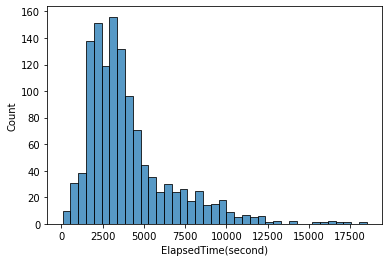

In [26]:
df = train[train['DiagnosticICD10Code'].str.len()==9]
sns.histplot(df["ElapsedTime(second)"])


<AxesSubplot:xlabel='ElapsedTime(second)', ylabel='Count'>

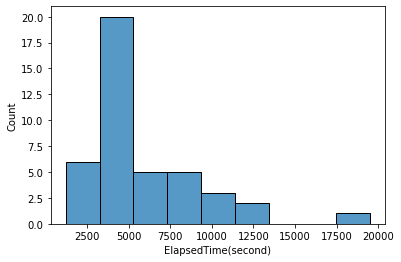

In [27]:
df = train[train['DiagnosticICD10Code'].str.len()==27]
sns.histplot(df["ElapsedTime(second)"])


In [35]:
import matplotlib.pyplot as plt

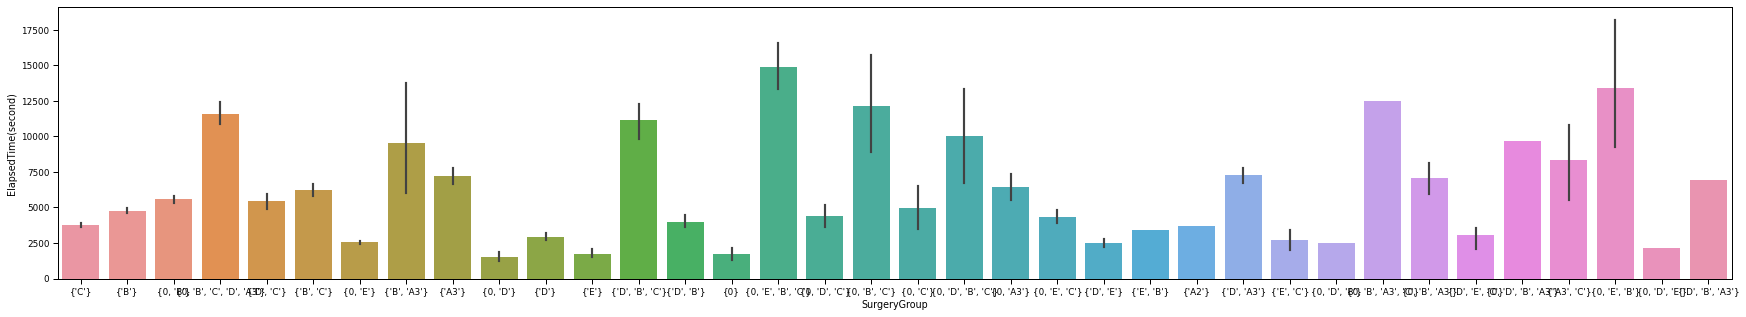

In [42]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=train["SurgeryGroup"], y="ElapsedTime(second)", data=train)
plt.show()


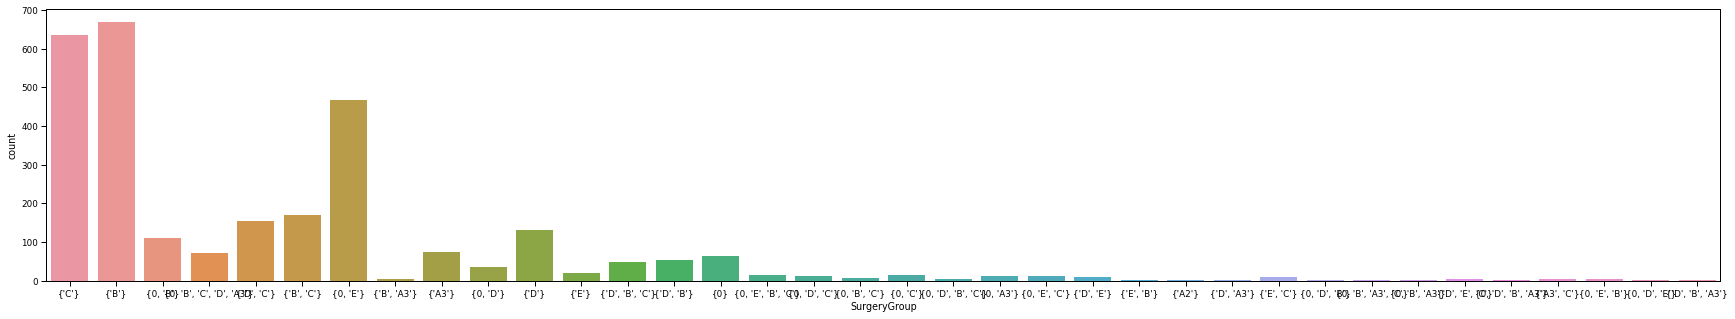

In [46]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.countplot(x=train["SurgeryGroup"], data=train)
plt.show()


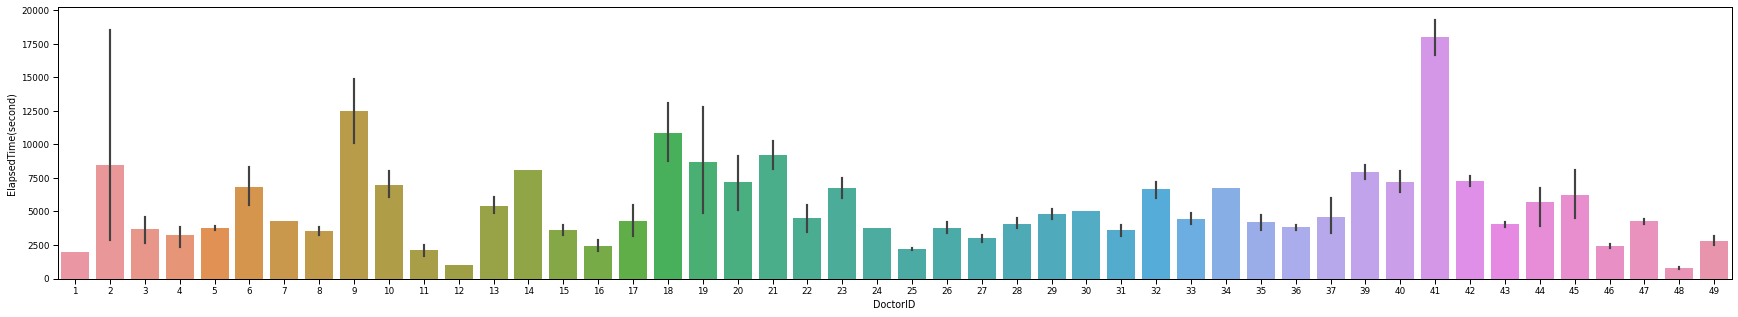

In [44]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=train["DoctorID"], y="ElapsedTime(second)", data=train)
plt.show()


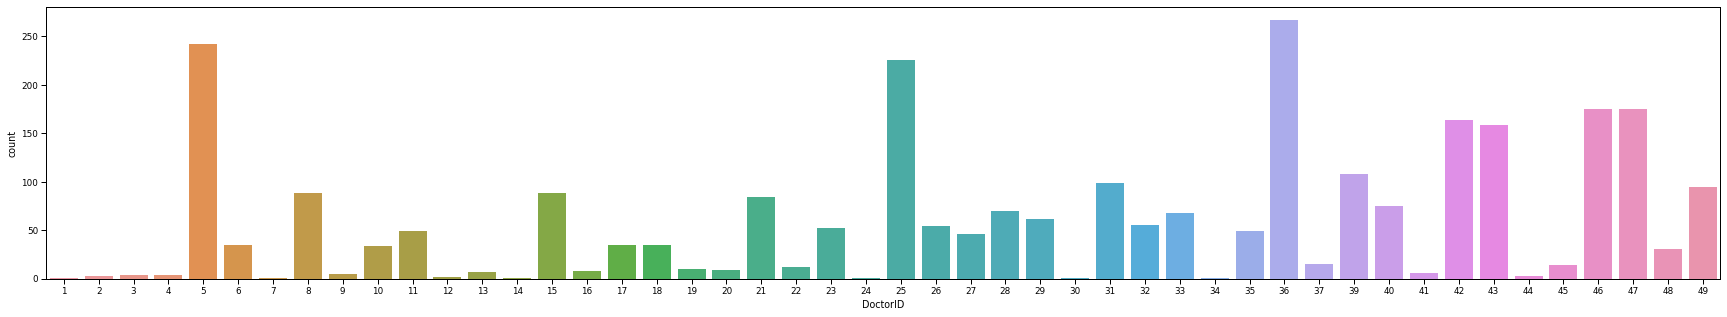

In [45]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.countplot(x=train["DoctorID"], data=train)
plt.show()


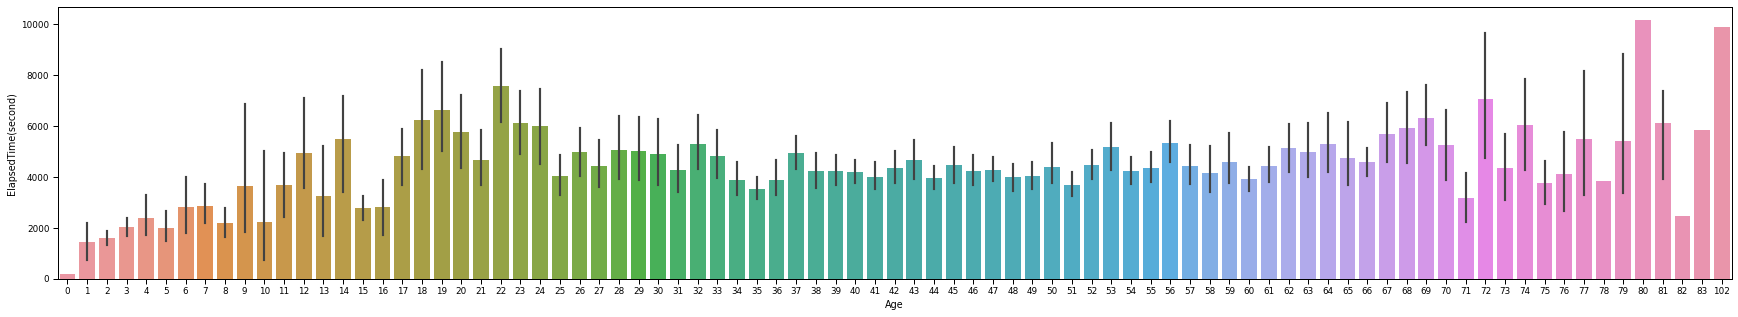

In [48]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=train["Age"], y="ElapsedTime(second)", data=train)
plt.show()


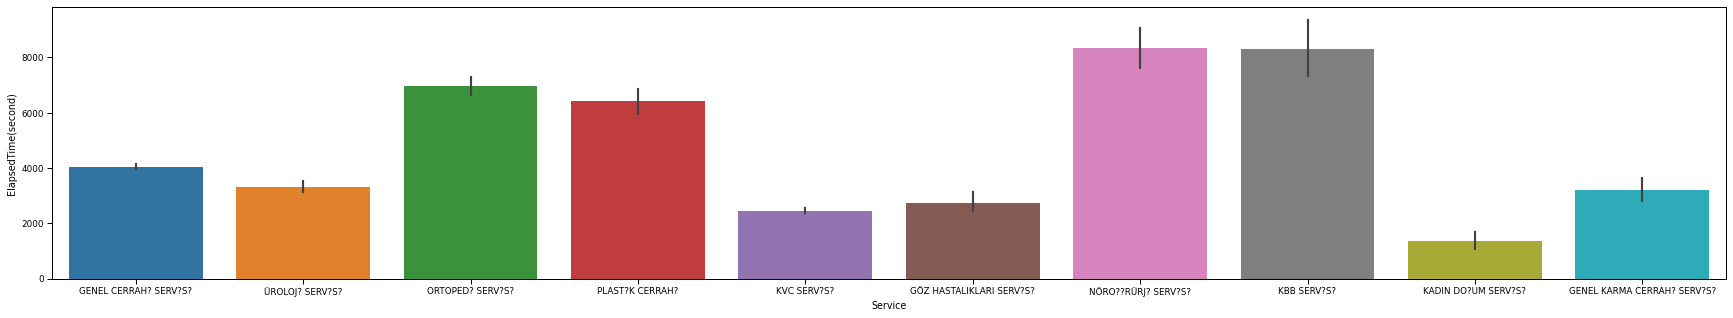

In [49]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=train["Service"], y="ElapsedTime(second)", data=train)
plt.show()


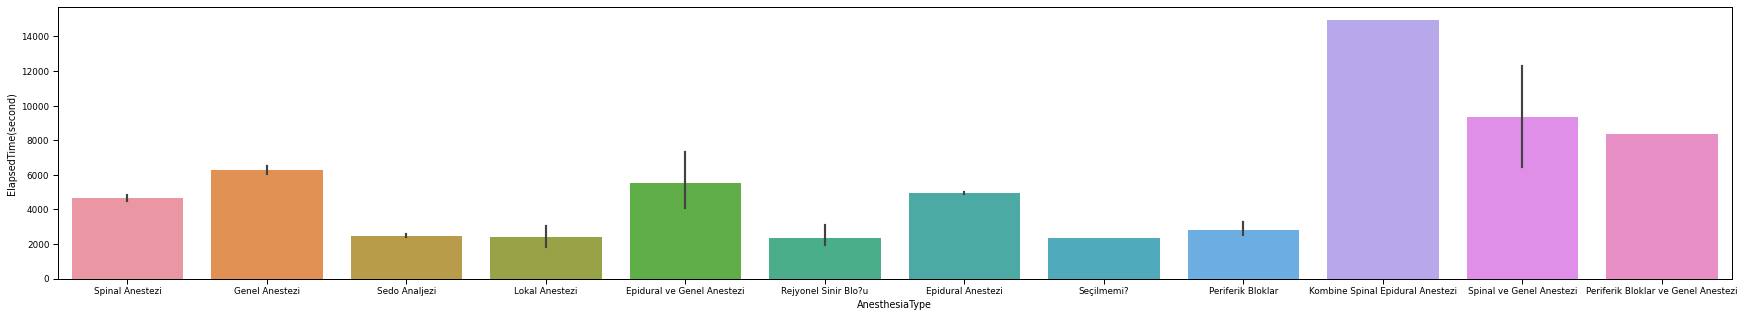

In [77]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x="AnesthesiaType", y="ElapsedTime(second)", data=train)
plt.show()


In [79]:
train[train["AnesthesiaType"].str.contains("Periferik", na=False)]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
564,270,{'M65.3'},{'D'},Periferik Bloklar,Tetik parmak,55,FEMALE,ORTOPED? SERV?S?,17,11,3485
724,210,{'G56.0'},{'C'},Periferik Bloklar,NaN,52,FEMALE,ORTOPED? SERV?S?,17,4,2674
1206,271,{'G56.0'},{'C'},Periferik Bloklar,tetik parmak,39,FEMALE,ORTOPED? SERV?S?,17,11,2463
1304,203,{'M65.3'},{'D'},Periferik Bloklar,NaN,51,FEMALE,ORTOPED? SERV?S?,17,4,2631
1978,1200,{'M72.0'},{'C'},Periferik Bloklar ve Genel Anestezi,"Fibroblastik bozukluk, tan?mlanmam??",57,MALE,PLAST?K CERRAH?,28,2,8352


In [67]:
np.mean(train["ElapsedTime(second)"])

4542.537916371368

In [69]:
df = train[train["ElapsedTime(second)"]>4500]
df.shape


(1030, 11)

In [81]:
df = train[train["DiagnosticICD10Code"].str.contains('H', na=False)]
df

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
11,3408,{'H25.1'},{'C'},Sedo Analjezi,Senil nükleer katarakt,62,FEMALE,GÖZ HASTALIKLARI SERV?S?,49,12,2203
30,256,{'H50'},{'C'},Genel Anestezi,"Strabismus di?er, tan?mlanm??",40,FEMALE,GÖZ HASTALIKLARI SERV?S?,49,9,8592
45,1605,{'H26.9'},{'C'},Sedo Analjezi,"Katarakt, tan?mlanmam??",68,MALE,GÖZ HASTALIKLARI SERV?S?,49,12,1962
46,1255,{'H26.9'},{'C'},Sedo Analjezi,"Katarakt, tan?mlanmam??",53,FEMALE,GÖZ HASTALIKLARI SERV?S?,49,9,2804
60,1378,{'H26.9'},{'C'},Sedo Analjezi,"Katarakt, tan?mlanmam??",76,FEMALE,GÖZ HASTALIKLARI SERV?S?,1,12,1967
...,...,...,...,...,...,...,...,...,...,...,...
2390,2458,{'H25.1'},{'C'},Sedo Analjezi,Senil nükleer katarakt,63,MALE,GÖZ HASTALIKLARI SERV?S?,49,14,2052
2446,2119,{'H02.9'},{'C'},Sedo Analjezi,"Göz kapa?? bozuklu?u, tan?mlanmam??",65,MALE,PLAST?K CERRAH?,39,4,4878
2452,1307,{'H26.9'},{'C'},Sedo Analjezi,NaN,70,MALE,GÖZ HASTALIKLARI SERV?S?,49,10,2450
2469,2384,{'H65.4'},{'B'},Genel Anestezi,NaN,47,FEMALE,KBB SERV?S?,6,11,6330


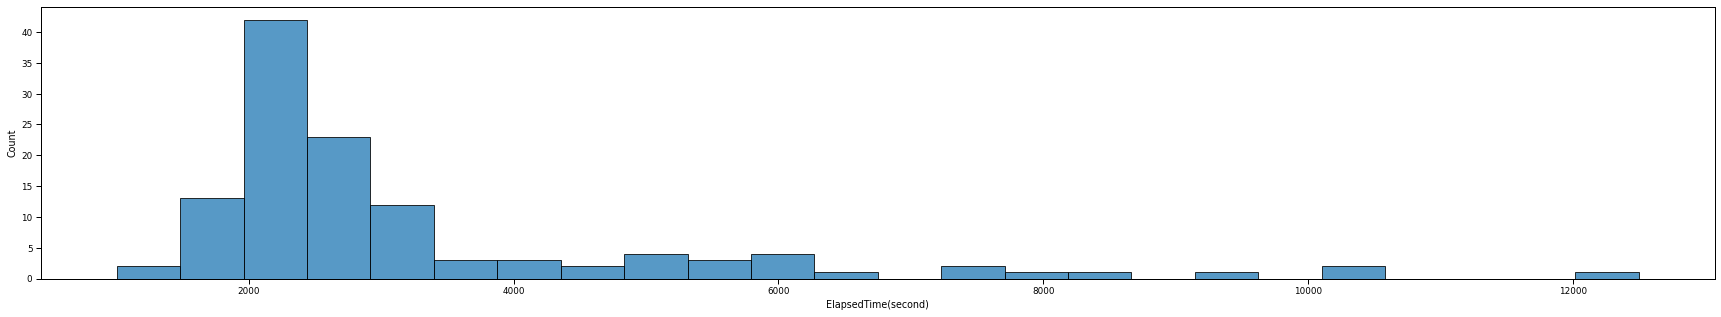

In [84]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.histplot(x="ElapsedTime(second)", data=df)
plt.show()


In [85]:
df = train[train["SurgeryGroup"].str.contains('A', na=False)]
df

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
4,608,"{'M51.1', nan, 'M48.0'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046
10,1433,{'Z12.6'},"{'B', 'A3'}",Spinal Anestezi,Mesane neoplazm? için özel tarama muayenesi,53,MALE,ÜROLOJ? SERV?S?,26,3,8310
18,2180,{'M50.1'},{'A3'},Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",56,MALE,ORTOPED? SERV?S?,42,11,8001
42,2529,{'M50.1'},{'A3'},Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",43,FEMALE,NÖRO??RÜRJ? SERV?S?,42,2,9140
43,3014,"{'M50.1', 'Z00.0', 'E03.9'}",{'A3'},Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",44,FEMALE,NÖRO??RÜRJ? SERV?S?,42,6,9818
...,...,...,...,...,...,...,...,...,...,...,...
2723,109,NaN,{'A3'},NaN,"Servikal disk bozukluklar?, radikülopati ile",55,FEMALE,ORTOPED? SERV?S?,42,4,6062
2724,75,NaN,"{'D', 'A3'}",NaN,NaN,22,MALE,GENEL CERRAH? SERV?S?,35,11,7757
2728,4,NaN,"{'D', 'B', 'A3'}",NaN,Barsak fistülü,66,MALE,GENEL CERRAH? SERV?S?,36,2,6901
2730,2442,NaN,{'A3'},NaN,Lumbar ve di?er intervertebral disk bozuklukla...,57,FEMALE,ORTOPED? SERV?S?,42,4,5786


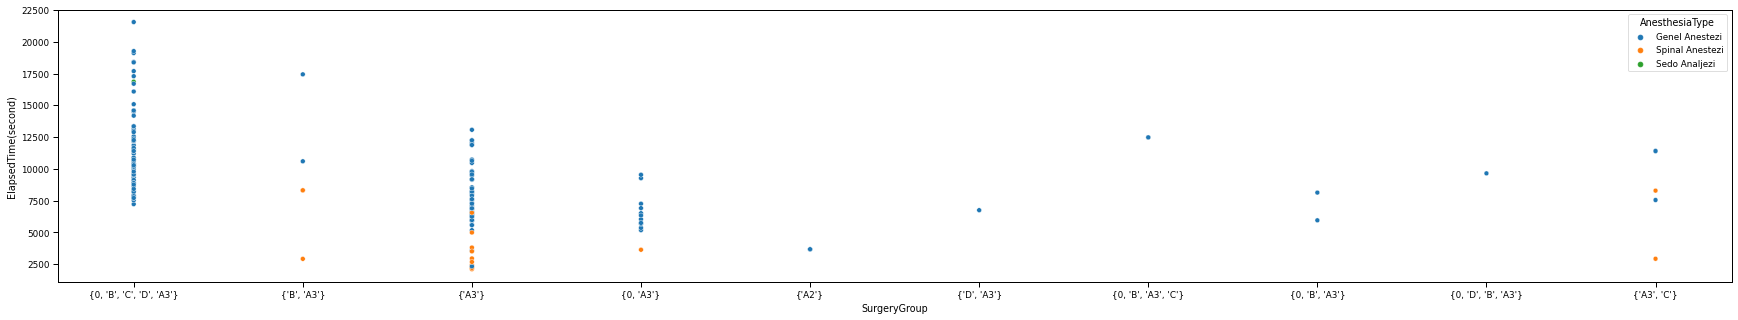

In [87]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.scatterplot(x="SurgeryGroup", y= "ElapsedTime(second)", hue="AnesthesiaType", data=df)
plt.show()


In [3]:
z = train.copy()
z["DiagnosticICD10Code"] = z["DiagnosticICD10Code"].str[1:-1]
z["DiagnosticICD10Code"] = z["DiagnosticICD10Code"].str.replace("'","")
z["SurgeryGroup"] = z["SurgeryGroup"].str[1:-1]
z["SurgeryGroup"] = z["SurgeryGroup"].str.replace("'","")
z.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
0,1829,L05,C,Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333
1,1104,N20.1,C,Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972
2,1850,K80.8,B,Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647
3,1059,"nan, M51.1","0, B",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871
4,608,"M51.1, nan, M48.0","0, B, C, D, A3",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046


In [4]:
map_dict = {'0': 1, 'E': 1, 'D': 2, 'C': 3, 'B': 4, 'A3': 5, 'A2': 6, 'A1': 7}

In [5]:
mapper = lambda x: [map_dict[val.strip()] for val in x.split(',')]

In [6]:
z["SurgeryGroup"] = z["SurgeryGroup"].apply(mapper)

In [7]:
z.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
0,1829,L05,[3],Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333
1,1104,N20.1,[3],Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972
2,1850,K80.8,[4],Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647
3,1059,"nan, M51.1","[1, 4]",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871
4,608,"M51.1, nan, M48.0","[1, 4, 3, 2, 5]",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046


In [8]:
z["sum"] = z["SurgeryGroup"].apply(lambda x: sum(x))
z.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),sum
0,1829,L05,[3],Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333,3
1,1104,N20.1,[3],Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972,3
2,1850,K80.8,[4],Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647,4
3,1059,"nan, M51.1","[1, 4]",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871,5
4,608,"M51.1, nan, M48.0","[1, 4, 3, 2, 5]",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046,15


## do max-min-mean-count too

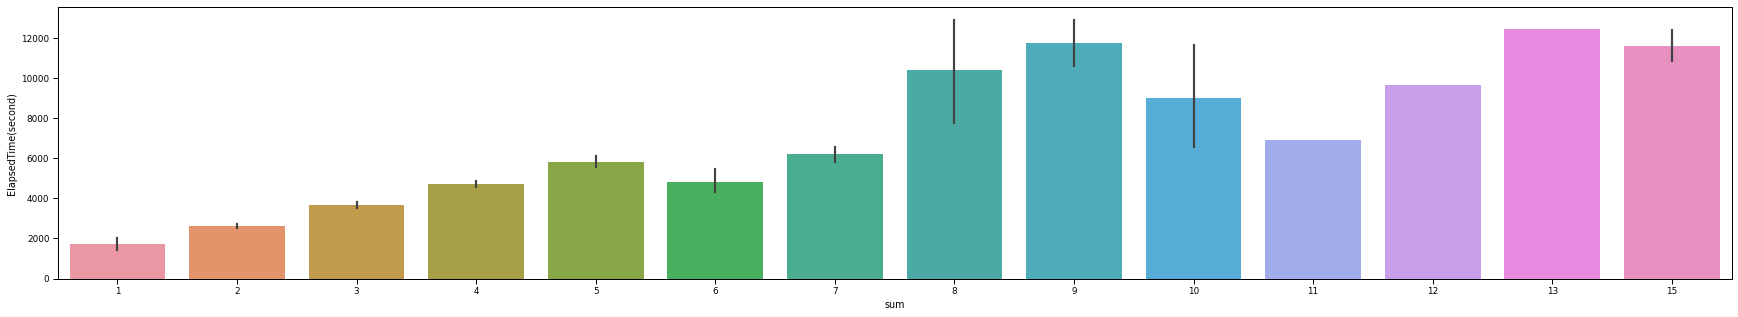

In [131]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x="sum", y="ElapsedTime(second)", data=z)
plt.show()


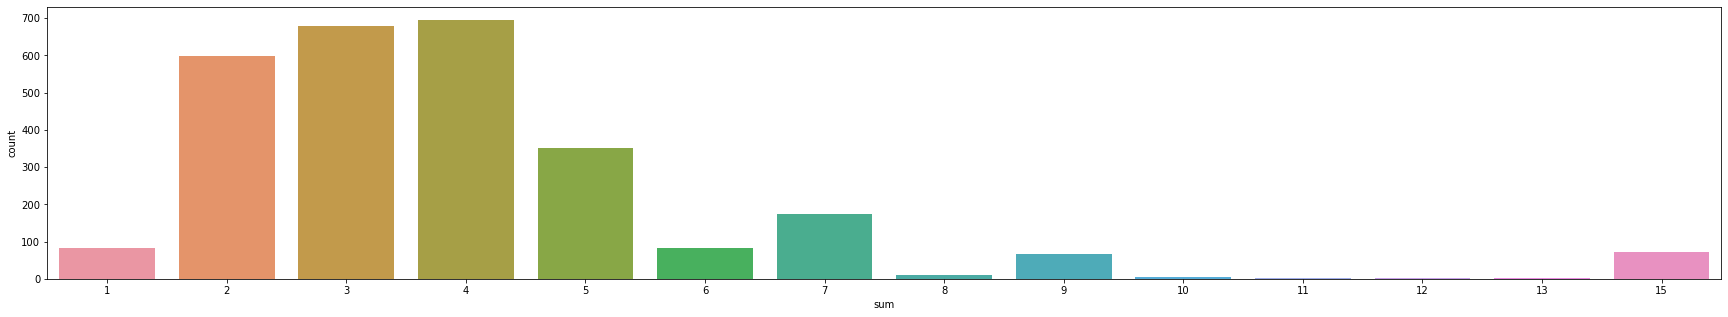

In [11]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.countplot(x="sum", data=z)
plt.show()


In [136]:
train.DiagnosticICD10Code.str.len().value_counts()


9.0     1258
7.0      471
14.0     320
12.0     119
18.0     105
23.0      63
16.0      48
27.0      42
36.0      33
25.0      27
32.0      21
34.0      15
10.0      14
21.0      12
30.0      11
24.0      10
33.0       5
17.0       4
43.0       3
41.0       3
45.0       2
22.0       2
19.0       2
28.0       2
15.0       2
42.0       2
26.0       2
40.0       1
79.0       1
50.0       1
Name: DiagnosticICD10Code, dtype: int64

In [135]:
train.iloc[train.DiagnosticICD10Code.str.len().sort_values(ascending=False).index][:20]


,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
92,3228,"{'K21.9', 'J15.9', 'N30.0', 'N21.1', 'N30.9', ...",{'B'},Spinal Anestezi,Üretra ta??,68,MALE,ÜROLOJ? SERV?S?,15,2,4581
2014,245,"{'K21.9', 'J15.9', 'R31', 'N30.0', 'M19.9', 'I...",{'C'},Spinal Anestezi,NaN,71,MALE,ÜROLOJ? SERV?S?,15,2,5415
651,448,"{'K21.9', 'J15.9', 'N20.0', 'N20.1', 'M19.9'}",{'B'},Genel Anestezi,Üreter ta??,30,MALE,ÜROLOJ? SERV?S?,15,9,3260
725,403,"{'K21.9', 'J15.9', 'N30.2', 'N20.0', 'M19.9'}",{'C'},Genel Anestezi,"Kronik sistitler, di?er",49,FEMALE,ÜROLOJ? SERV?S?,15,5,2710
622,1105,"{'K21.9', 'N30.2', 'R31', 'N30.0', 'M19.9'}",{'B'},Spinal Anestezi,NaN,47,FEMALE,ÜROLOJ? SERV?S?,15,3,6159
415,3710,"{'K80.8', 'L30', 'K29.1', 'M79.9', 'M79.1'}",{'B'},Genel Anestezi,"Kolesistitler, di?er",51,FEMALE,GENEL CERRAH? SERV?S?,29,6,6351
2094,1105,"{'K21.9', 'N30.2', 'R31', 'N30.0', 'M19.9'}",{'B'},Spinal Anestezi,NaN,47,FEMALE,ÜROLOJ? SERV?S?,15,3,6163
2295,1475,"{nan, 'M51.1', 'M43.1', 'M48.06', 'K29.1'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,67,FEMALE,ORTOPED? SERV?S?,42,13,10280
198,889,"{nan, 'M51.1', 'M54.5', 'M43.1', 'M48.06'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Bel a?r?s?,43,FEMALE,ORTOPED? SERV?S?,42,3,8649
251,2514,"{nan, 'K80.8', 'L30.8', 'K29.1', 'M79.1'}","{'D', 'B'}",Genel Anestezi,"Kolelitiazis, di?er",50,FEMALE,GENEL CERRAH? SERV?S?,29,12,5006


In [12]:
train.SurgeryGroup.value_counts()

{'B'}                       670
{'C'}                       635
{0, 'E'}                    467
{'B', 'C'}                  169
{'D', 'C'}                  155
{'D'}                       131
{0, 'B'}                    109
{'A3'}                       73
{0, 'B', 'C', 'D', 'A3'}     71
{0}                          63
{'D', 'B'}                   52
{'D', 'B', 'C'}              49
{0, 'D'}                     36
{'E'}                        20
{0, 'C'}                     14
{0, 'E', 'B', 'C'}           13
{0, 'A3'}                    12
{0, 'E', 'C'}                12
{0, 'D', 'C'}                11
{'E', 'C'}                   10
{'D', 'E'}                    9
{0, 'B', 'C'}                 6
{'B', 'A3'}                   5
{'A3', 'C'}                   5
{0, 'D', 'B', 'C'}            4
{0, 'E', 'B'}                 4
{'D', 'E', 'C'}               3
{0, 'B', 'A3'}                2
{'D', 'A3'}                   2
{0, 'B', 'A3', 'C'}           2
{0, 'D', 'B'}                 2
{'A2'}  

In [16]:
train.iloc[train.DiagnosticICD10Code.str.len().sort_values(ascending=False).index][:20]


,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
92,3228,"{'K21.9', 'J15.9', 'N30.0', 'N21.1', 'N30.9', ...",{'B'},Spinal Anestezi,Üretra ta??,68,MALE,ÜROLOJ? SERV?S?,15,2,4581
2014,245,"{'K21.9', 'J15.9', 'R31', 'N30.0', 'M19.9', 'I...",{'C'},Spinal Anestezi,NaN,71,MALE,ÜROLOJ? SERV?S?,15,2,5415
651,448,"{'K21.9', 'J15.9', 'N20.0', 'N20.1', 'M19.9'}",{'B'},Genel Anestezi,Üreter ta??,30,MALE,ÜROLOJ? SERV?S?,15,9,3260
725,403,"{'K21.9', 'J15.9', 'N30.2', 'N20.0', 'M19.9'}",{'C'},Genel Anestezi,"Kronik sistitler, di?er",49,FEMALE,ÜROLOJ? SERV?S?,15,5,2710
622,1105,"{'K21.9', 'N30.2', 'R31', 'N30.0', 'M19.9'}",{'B'},Spinal Anestezi,NaN,47,FEMALE,ÜROLOJ? SERV?S?,15,3,6159
415,3710,"{'K80.8', 'L30', 'K29.1', 'M79.9', 'M79.1'}",{'B'},Genel Anestezi,"Kolesistitler, di?er",51,FEMALE,GENEL CERRAH? SERV?S?,29,6,6351
2094,1105,"{'K21.9', 'N30.2', 'R31', 'N30.0', 'M19.9'}",{'B'},Spinal Anestezi,NaN,47,FEMALE,ÜROLOJ? SERV?S?,15,3,6163
2295,1475,"{nan, 'M51.1', 'M43.1', 'M48.06', 'K29.1'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,67,FEMALE,ORTOPED? SERV?S?,42,13,10280
198,889,"{nan, 'M51.1', 'M54.5', 'M43.1', 'M48.06'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Bel a?r?s?,43,FEMALE,ORTOPED? SERV?S?,42,3,8649
251,2514,"{nan, 'K80.8', 'L30.8', 'K29.1', 'M79.1'}","{'D', 'B'}",Genel Anestezi,"Kolelitiazis, di?er",50,FEMALE,GENEL CERRAH? SERV?S?,29,12,5006


In [20]:
train["str_len"] = train["DiagnosticICD10Code"].str.len()
train.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),str_len
0,1829,{'L05'},{'C'},Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333,7.0
1,1104,{'N20.1'},{'C'},Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972,9.0
2,1850,{'K80.8'},{'B'},Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647,9.0
3,1059,"{nan, 'M51.1'}","{0, 'B'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871,14.0
4,608,"{'M51.1', nan, 'M48.0'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046,23.0


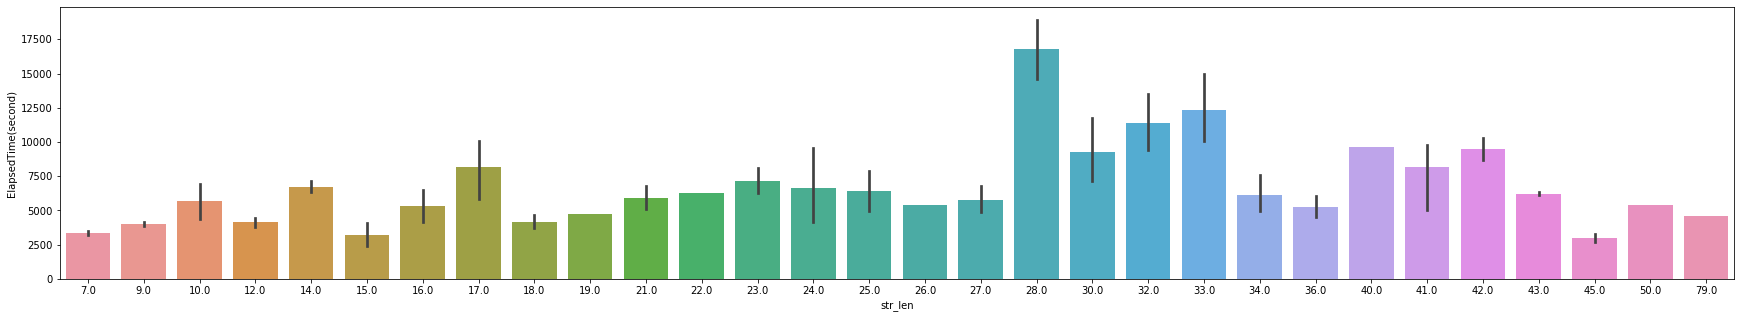

In [21]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x="str_len", y="ElapsedTime(second)", data=train)
plt.show()

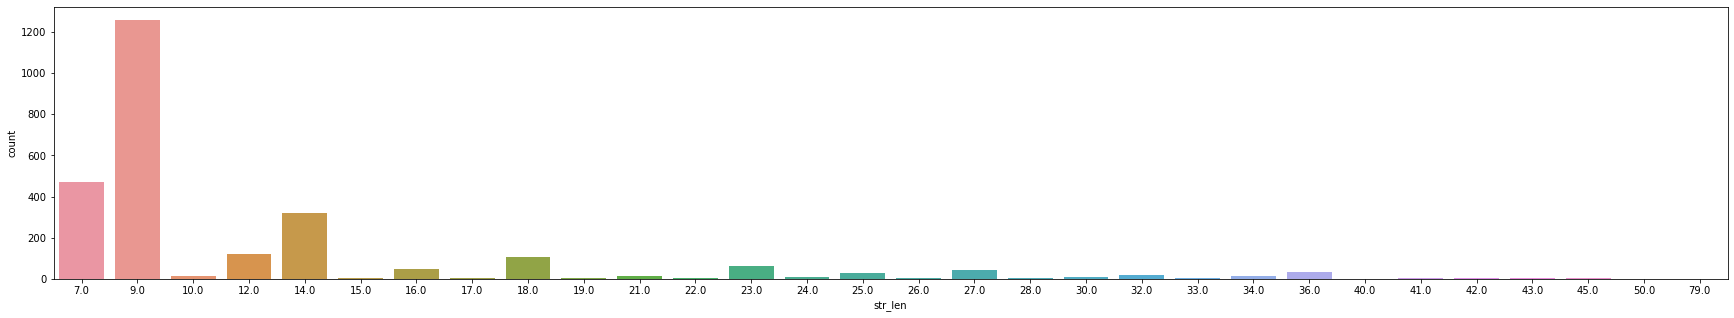

In [22]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.countplot(x="str_len", data=train)
plt.show()

In [26]:
import pandas as pd
import itertools

# example DataFrame
df = pd.DataFrame({'Patient ID': [1, 2, 3],
                   'Diagnosis': [['M25.5', 'K21.0', 'S82.0', 'Z00.8'],
                                 ['M51.1', 'M48.0'],
                                 ['N20.1', 'N32.9']]})

# function to generate all possible combinations for a list of diagnoses
def generate_combinations(diagnoses):
    combinations = []
    for i in range(1, 6):
        for combo in itertools.combinations(diagnoses, i):
            combinations.append(list(combo))
    return combinations

# generate all combinations for each patient and add them as new columns to the DataFrame
for i, row in df.iterrows():
    combos = generate_combinations(row['Diagnosis'])
    for j, combo in enumerate(combos):
        col_name = f'comb_{j+1}'
        df.at[i, col_name] = combo

# fill NaN values for patients with less than 5 diagnoses
df.fillna(value=pd.np.nan, inplace=True)
df = df.reindex(columns=[*df.columns.tolist(), *[f'comb_{i+1}' for i in range(31)]], fill_value=pd.np.nan)

# drop original 'Diagnosis' column
df.drop('Diagnosis', axis=1, inplace=True)

ValueError: Must have equal len keys and value when setting with an iterable

In [25]:
df

,diagnosis,diagnosis_combinations
0,"{S82.0, M25.5, Z00.8, K21.0}","[(S82.0,), (M25.5,), (Z00.8,), (K21.0,), (S82...."
1,"{K21.9, N32.9, K59.1, N30.0}","[(K21.9,), (N32.9,), (K59.1,), (N30.0,), (K21...."
2,"{M51.1, M48.0, <NA>}","[(M51.1,), (M48.0,), (<NA>,), (M51.1, M48.0), ..."
3,{N20.1},"[(N20.1,)]"


In [14]:
import pandas as pd
import itertools

# example DataFrame
df = pd.DataFrame({'Patient ID': [1, 2, 3],
                   'Diagnosis': [['M25.5', 'K21.0', 'S82.0', 'Z00.8'],
                                 ['M51.1', 'M48.0'],
                                 ['N20.1', 'N32.9']]})

# function to generate all possible combinations for a list of diagnoses
def generate_combinations(diagnoses):
    combinations = []
    for i in range(1, 6):
        for combo in itertools.combinations(diagnoses, i):
            combinations.append(list(combo))
    return combinations

# generate all combinations for each patient and add them as new columns to the DataFrame
for i, row in df.iterrows():
    combos = generate_combinations(row['Diagnosis'])
    for j, combo in enumerate(combos):
        col_name = f'comb_{j+1}'
        combo_values = [combo if k == i else pd.NA for k in range(len(df))]
        df[col_name] = combo_values

# drop original 'Diagnosis' column
df.drop('Diagnosis', axis=1, inplace=True)


In [15]:
df

,Patient ID,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15
0,1,<NA>,<NA>,<NA>,[Z00.8],"[M25.5, K21.0]","[M25.5, S82.0]","[M25.5, Z00.8]","[K21.0, S82.0]","[K21.0, Z00.8]","[S82.0, Z00.8]","[M25.5, K21.0, S82.0]","[M25.5, K21.0, Z00.8]","[M25.5, S82.0, Z00.8]","[K21.0, S82.0, Z00.8]","[M25.5, K21.0, S82.0, Z00.8]"
1,2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,3,[N20.1],[N32.9],"[N20.1, N32.9]",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [17]:
import pandas as pd
import itertools

# example DataFrame
df = pd.DataFrame({'Patient ID': [1, 2, 3],
                   'Diagnosis': [['M25.5', 'K21.0', 'S82.0', 'Z00.8'],
                                 ['M51.1', 'M48.0'],
                                 ['N20.1', 'N32.9']]})

# function to generate all possible combinations for a list of diagnoses
def generate_combinations(diagnoses):
    combinations = []
    for i in range(1, 6):
        for combo in itertools.combinations(diagnoses, i):
            combinations.append(list(combo))
    return combinations

# generate all combinations for each patient and add them as new columns to the DataFrame
for i, row in df.iterrows():
    combos = generate_combinations(row['Diagnosis'])
    for j, combo in enumerate(combos):
        col_name = f'comb_{j+1}'
        combo_values = [combo if k == i else pd.NA for k in df.index]
        df[col_name] = combo_values

# drop original 'Diagnosis' column
df.drop('Diagnosis', axis=1, inplace=True)

In [18]:
df.shape

(3, 16)

In [22]:
import pandas as pd
import itertools

# example DataFrame
df = pd.DataFrame({'Patient ID': [1, 2, 3],
                   'Diagnosis': [['M25.5', 'K21.0', 'S82.0', 'Z00.8'],
                                 ['M51.1', 'M48.0'],
                                 ['N20.1', 'N32.9']]})

# function to generate all possible combinations for a list of diagnoses
def generate_combinations(diagnoses):
    combinations = []
    for i in range(1, 6):
        for combo in itertools.combinations(diagnoses, i):
            combinations.append(list(combo))
    return combinations

# generate all combinations for each patient and add them as new columns to the DataFrame
for i, row in df.iterrows():
    combos = generate_combinations(row['Diagnosis'])
    combo_values = [pd.NA] * len(df) # create a list of NaN values with the same length as the DataFrame
    for j, combo in enumerate(combos):
        col_name = f'comb_{j+1}'
        combo_indices = [i] * len(combo) # create a list of the same patient ID for each diagnosis in the combo
        combo_values[combo_indices] = combo # assign the combo values to the appropriate indices in the list
        df[col_name] = combo_values # assign the list to the DataFrame column

# drop original 'Diagnosis' column
df.drop('Diagnosis', axis=1, inplace=True)

print(df)


TypeError: list indices must be integers or slices, not list

In [40]:
import pandas as pd
import itertools

# example DataFrame
df = pd.DataFrame({'Patient ID': [1, 2, 3],
                   'Diagnosis': [{'M25.5', 'K21.0', 'S82.0', 'Z00.8'},
                                 {'M51.1', 'M48.0'},
                                 {'L30.8', 'M79.1', 'K29.1', 'K80.8','T'}]})

# function to generate all possible combinations for a set of diagnoses
def generate_combinations(diagnoses):
    first_chars = [diag[0] for diag in diagnoses]
    combinations = []
    for i in range(1, len(diagnoses)+1):
        for combo in itertools.combinations(first_chars, i):
            combinations.append(''.join(combo))
    return combinations

# generate all combinations for each patient and add them as new columns to the DataFrame
for i, row in df.iterrows():
    combos = generate_combinations(row['Diagnosis'])
    for j, combo in enumerate(combos):
        col_name = f'comb_{j+1}'
        df.at[i, col_name] = combo

# drop original 'Diagnosis' column
df.drop('Diagnosis', axis=1, inplace=True)

print(df)

   Patient ID comb_1 comb_2 comb_3 comb_4 comb_5 comb_6 comb_7 comb_8 comb_9  \
0           1      Z      S      K      M     ZS     ZK     ZM     SK     SM   
1           2      M      M     MM    NaN    NaN    NaN    NaN    NaN    NaN   
2           3      L      K      M      T      K     LK     LM     LT     LK   

  comb_10 comb_11 comb_12 comb_13 comb_14 comb_15 comb_16 comb_17 comb_18  \
0      KM     ZSK     ZSM     ZKM     SKM    ZSKM     NaN     NaN     NaN   
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2      KM      KT      KK      MT      MK      TK     LKM     LKT     LKK   

  comb_19 comb_20 comb_21 comb_22 comb_23 comb_24 comb_25 comb_26 comb_27  \
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2     LMT     LMK     LTK     KMT     KMK     KTK     MTK    LKMT    LKMK   

  comb_28 comb_29 comb_30 comb_31  
0     NaN     NaN     NaN

In [41]:
df.head()

,Patient ID,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31
0,1,Z,S,K,M,ZS,ZK,ZM,SK,SM,KM,ZSK,ZSM,ZKM,SKM,ZSKM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,M,M,MM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,L,K,M,T,K,LK,LM,LT,LK,KM,KT,KK,MT,MK,TK,LKM,LKT,LKK,LMT,LMK,LTK,KMT,KMK,KTK,MTK,LKMT,LKMK,LKTK,LMTK,KMTK,LKMTK


In [31]:
import pandas as pd
import itertools

# example DataFrame
df = pd.DataFrame({'Patient ID': [1, 2, 3],
                   'Diagnosis': [{'M25.5', 'K21.0', 'S82.0', 'Z00.8'},
                                 {'M51.1', 'M48.0'},
                                 {'L30.8', 'M79.1', 'K29.1', 'K80.8','T08'}]})

# function to generate all possible combinations for a list of diagnoses
def generate_combinations(diagnoses):
    combinations = []
    for combo in itertools.chain.from_iterable(itertools.combinations(diagnoses, r) for r in range(len(diagnoses) + 1)):
        combinations.append(list(combo))
    return combinations

# generate all combinations for each patient and add them as new columns to the DataFrame
for i, row in df.iterrows():
    combos = generate_combinations(row['Diagnosis'])
    for j, combo in enumerate(combos):
        col_name = f'comb_{j+1}'
        df.at[i, col_name] = ''.join([d[0] for d in combo])

# drop original 'Diagnosis' column
df.drop('Diagnosis', axis=1, inplace=True)

print(df)

   Patient ID comb_1 comb_2 comb_3 comb_4 comb_5 comb_6 comb_7 comb_8 comb_9  \
0           1             Z      S      K      M     ZS     ZK     ZM     SK   
1           2             M      M     MM    NaN    NaN    NaN    NaN    NaN   
2           3             L      K      M      K      T     LK     LM     LK   

   ... comb_23 comb_24 comb_25 comb_26 comb_27 comb_28 comb_29 comb_30  \
0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2  ...     KMK     KMT     KKT     MKT    LKMK    LKMT    LKKT    LMKT   

  comb_31 comb_32  
0     NaN     NaN  
1     NaN     NaN  
2    KMKT   LKMKT  

[3 rows x 33 columns]


In [36]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [37]:
df

,Patient ID,comb_1,comb_2,comb_3,comb_4,comb_5,comb_6,comb_7,comb_8,comb_9,comb_10,comb_11,comb_12,comb_13,comb_14,comb_15,comb_16,comb_17,comb_18,comb_19,comb_20,comb_21,comb_22,comb_23,comb_24,comb_25,comb_26,comb_27,comb_28,comb_29,comb_30,comb_31,comb_32
0,1,,Z,S,K,M,ZS,ZK,ZM,SK,SM,KM,ZSK,ZSM,ZKM,SKM,ZSKM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,,M,M,MM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,,L,K,M,K,T,LK,LM,LK,LT,KM,KK,KT,MK,MT,KT,LKM,LKK,LKT,LMK,LMT,LKT,KMK,KMT,KKT,MKT,LKMK,LKMT,LKKT,LMKT,KMKT,LKMKT


## to-do: combination of every diagnosis, first sort diagnosis codes